# Displaying ZTF alerts

This short notebook shows how to open, explore and display information contained in an alert from ZTF. Alerts are serialised in Avro format.

**Pre-requisite**
- Python 3.5+
- fink_client x.y.z+ with dependencies

**Additional information**
- ZTF alert schema described: https://zwickytransientfacility.github.io/ztf-avro-alert/
- Apache Avro: http://avro.apache.org/
- Fink documentation: https://fink-broker.readthedocs.io/en/latest/

In [1]:
import matplotlib.pyplot as plt
import matplotlib

import numpy as np

from fink_client.avroUtils import AlertReader
from fink_client.visualisation import show_stamps
from fink_client.visualisation import extract_field

In [2]:
# For plots
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   :22}

matplotlib.rc('font', **font)

# Bands
filter_color = {1: '#1f77b4', 2: '#ff7f0e', 3: '#2ca02c'}
# [
#     '#1f77b4',  # muted blue
#     '#ff7f0e',  # safety orange
#     '#2ca02c',  # cooked asparagus green
#     '#d62728',  # brick red
#     '#9467bd',  # muted purple
#     '#8c564b',  # chestnut brown
#     '#e377c2',  # raspberry yogurt pink
#     '#7f7f7f',  # middle gray
#     '#bcbd22',  # curry yellow-green
#     '#17becf'   # blue-teal
# ]
filter_name = {1: 'g band', 2: 'r band', 3: 'i band'}

## Load alert data

ZTF alert data are serialised in Avro format. Since this format is not widely spread in the astronomy community, we provide the class `AlertReader` to ease the alert manipulation. You can pass to it a single alert file, or a folder containing alerts:

In [8]:
# The reader can read all alerts contained in a folder
r = AlertReader('../datatest')

The reader has methods to load data, and you will probably find useful the `to_pandas` method that loads alert data into a Pandas DataFrame:

In [9]:
# Store alert data in a Pandas DataFrame
df = r.to_pandas()

df

,schemavsn,publisher,objectId,candid,candidate,prv_candidates,cutoutScience,cutoutTemplate,cutoutDifference
0,3.3,ZTF (www.ztf.caltech.edu),ZTF19acyjzeo,1079564896215015003,"{'jd': 2458834.0648958, 'fid': 1, 'pid': 10795...","[{'jd': 2458805.0150694, 'fid': 1, 'pid': 1050...",{'fileName': 'candid1079564896215015003_pid107...,{'fileName': 'candid1079564896215015003_ref.fi...,{'fileName': 'candid1079564896215015003_pid107...
1,3.3,ZTF (www.ztf.caltech.edu),ZTF19acihgng,1060135832015015002,"{'jd': 2458814.6358333, 'fid': 2, 'pid': 10601...","[{'jd': 2458785.6433218, 'fid': 2, 'pid': 1031...",{'fileName': 'candid1060135832015015002_pid106...,{'fileName': 'candid1060135832015015002_ref.fi...,{'fileName': 'candid1060135832015015002_pid106...
2,3.3,ZTF (www.ztf.caltech.edu),ZTF19acxxwrs,1079453312715015005,"{'jd': 2458833.9533102, 'fid': 2, 'pid': 10794...","[{'jd': 2458805.0081134, 'fid': 1, 'pid': 1050...",{'fileName': 'candid1079453312715015005_pid107...,{'fileName': 'candid1079453312715015005_ref.fi...,{'fileName': 'candid1079453312715015005_pid107...
3,3.3,ZTF (www.ztf.caltech.edu),ZTF19acyfkzd,1079262803715015019,"{'jd': 2458833.7628009, 'fid': 2, 'pid': 10792...","[{'jd': 2458803.8145718, 'fid': 2, 'pid': 1049...",{'fileName': 'candid1079262803715015019_pid107...,{'fileName': 'candid1079262803715015019_ref.fi...,{'fileName': 'candid1079262803715015019_pid107...


Similarly, you have a method `to_list`, that loads the data into a list of dictionaries (each alert being a dictionary).

**Exercise:** Explore the content of alerts. What information is available? You will find the description of each field at https://zwickytransientfacility.github.io/ztf-avro-alert/

# Display cutouts

You might have noticed the fields `cutout*` in each alert. These fields are 30x30 pixels image around the position of the alert. You have 3 such fields:
- `cutoutScience`: the observation made by ZTF
- `cutoutTemplate`: the reference image used to make the comparison with the observation
- `cutoutDifference`: The difference between the observation and the reference image.

ZTF19acyjzeo
INFO: Auto-setting vmin to  5.484e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.888e+02 [aplpy.core]


INFO: Auto-setting vmin to  8.260e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.775e+02 [aplpy.core]


INFO: Auto-setting vmin to -3.200e+01 [aplpy.core]
INFO: Auto-setting vmax to  6.275e+01 [aplpy.core]


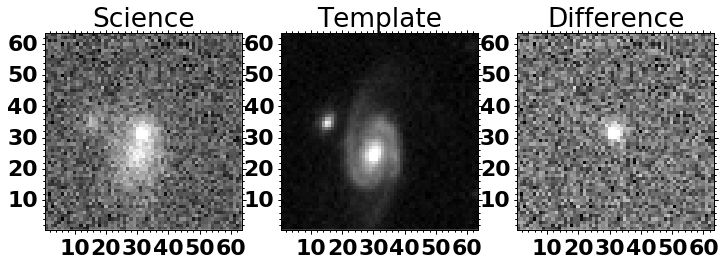

In [37]:
# Take the first alert
alert = r.to_list(size=1)[0]

# Display the cutouts contained in the alert
print(alert['objectId'])
show_stamps(alert)

## Display lightcurve data

Each alert has the information about the current observation (field `candidate`), but it also contains historical information at the same location up to one month (field `prv_candidates`). This allows us to reconstruct the lightcurve for example. Note that we use the magnitude from PSF-fit photometry here (we could also have derived the apparent magnitude from the different fields)

In [25]:
# Load alert data
alerts = r.to_list()

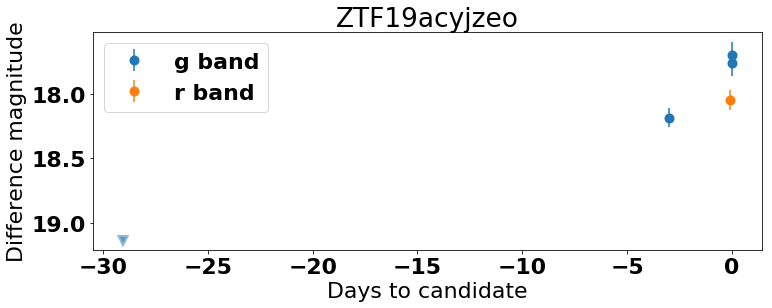

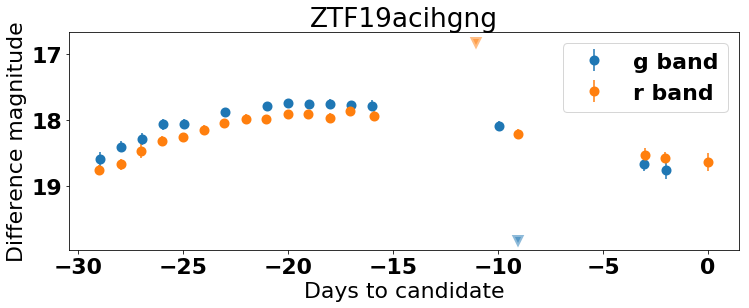

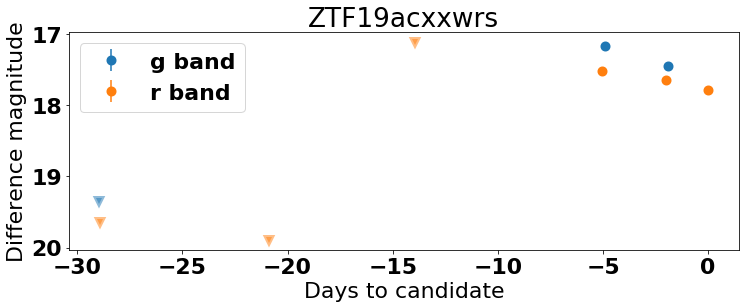

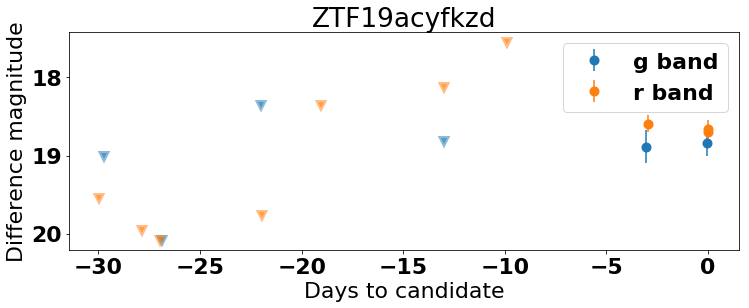

In [30]:
# and plot the difference magnitude as function of time. 
# Measurements and upper limits are treated separately.
for alert in alerts:
    # extract current and historical data as one vector
    mag = extract_field(alert, 'magpsf')
    error = extract_field(alert, 'sigmapsf')
    upper = extract_field(alert, "diffmaglim")
    
    # filter bands
    fid = extract_field(alert, "fid")
    
    # Rescale dates to end at 0
    jd = extract_field(alert, "jd")
    dates = np.array([i - jd[0] for i in jd])

    # Title of the plot (alert ID)
    title = alert["objectId"]

    # loop over filters
    fig = plt.figure(figsize=(12,4))
    
    # Loop over each filter
    for filt in filter_color.keys():
        mask = np.where(fid == filt)[0]
        
        # Skip if no data
        if len(mask) == 0:
            continue

        # detection vs upper limit symbols
        symbols = [
            "circle" if i is not None else "triangle-down" for i in error[mask]]

        # y data
        maskNotNone = mag[mask] != None
        plt.errorbar(
            dates[mask][maskNotNone], mag[mask][maskNotNone], yerr=error[mask][maskNotNone], 
            color=filter_color[filt], marker='o', ls='', label=filter_name[filt], mew=4)
        # Upper limits
        plt.plot(
            dates[mask][~maskNotNone], upper[mask][~maskNotNone], 
            color=filter_color[filt], marker='v', ls='', mew=4, alpha=0.5)
        plt.title(title)
    plt.legend()
    plt.gca().invert_yaxis()
    plt.xlabel('Days to candidate')
    plt.ylabel('Difference magnitude')
    plt.show()